In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df['gender'] = df['gender'].astype('category')
df['ever_married'] = df['ever_married'].astype('category')
df['work_type'] = df['work_type'].astype('category')
df['Residence_type'] = df['Residence_type'].astype('category')
df['smoking_status'] = df['smoking_status'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   category
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: category(5), float64(3), int64(4)
memory usage: 305.3 KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Preparation

In [7]:
#Explore missing values
missing_values = (df.isnull().sum())
missing_values


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [16]:
#caculate the percentage of missing data in the bmi feature
percentage_missing_values = missing_values/df['bmi'].count()
print('Roughly {}% of data is missing'.format(percentage_missing_values['bmi']))

Roughly 0.040945202688938684% of data is missing


In [17]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [18]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [19]:
df.drop(labels=3116, axis=0, inplace=True)

# EDA

In [38]:
# Labeling data fields to Text value for easy interpretation of Visualization
data_eda = df.copy()
#hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
data_eda["hypertension"]     = df["hypertension"]    .map({1: "Yes",           0: "No"})
#1 if the patient had a stroke or 0 if not
data_eda["stroke"]     = df["stroke"]    .map({1: "Yes",           0: "No"})
#0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
data_eda["heart_disease"]  = df["heart_disease"] .map({1: "Yes" ,           0: "No"})

## Gender Distribution Pie Chart

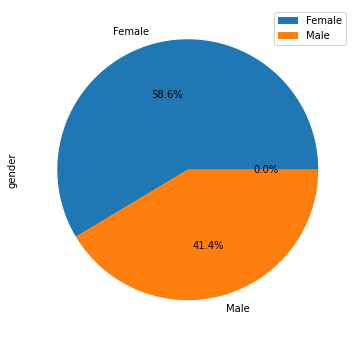

In [50]:
plt.figure(figsize=(6,6))
data_eda['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Hypertension Distribution Pie Chart

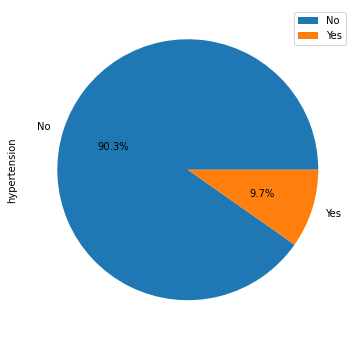

In [45]:
plt.figure(figsize=(6,6))
data_eda['hypertension'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Heart Disease Distribution Pie Chart

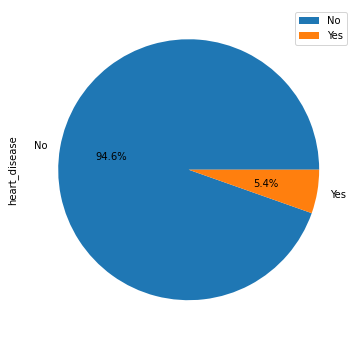

In [48]:
plt.figure(figsize=(6,6))
data_eda['heart_disease'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Ever Married Distribution Pie Chart

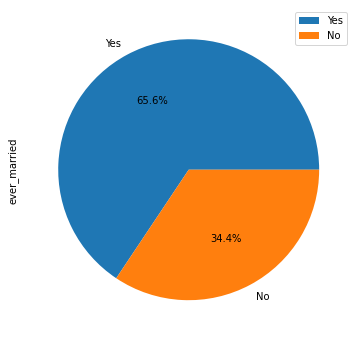

In [49]:
plt.figure(figsize=(6,6))
data_eda['ever_married'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Work Type Distribution Pie Chart

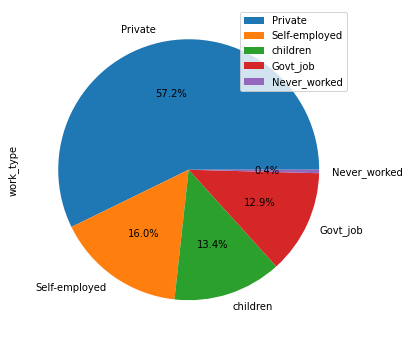

In [60]:
plt.figure(figsize=(6,6))
data_eda['work_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='best')

## Residence Type Distribution Pie Chart

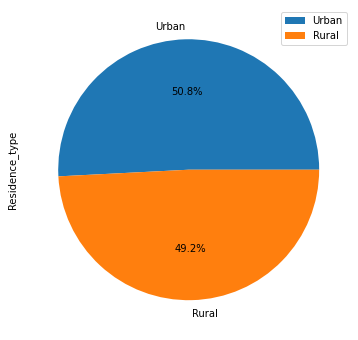

In [61]:
plt.figure(figsize=(6,6))
data_eda['Residence_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

## Smoking Status Distribution Pie Chart

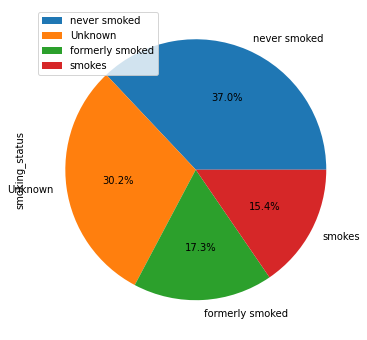

In [63]:
plt.figure(figsize=(6,6))
data_eda['smoking_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper left')

## Stroke Distribution Pie Chart

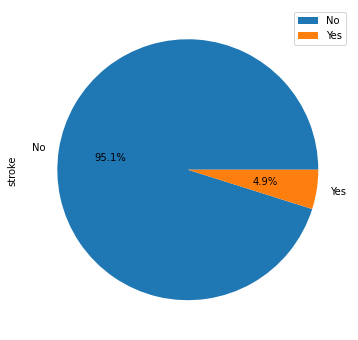

In [64]:
plt.figure(figsize=(6,6))
data_eda['stroke'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.legend(loc='upper right')

C:\Users\swimt\.conda\envs\School\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

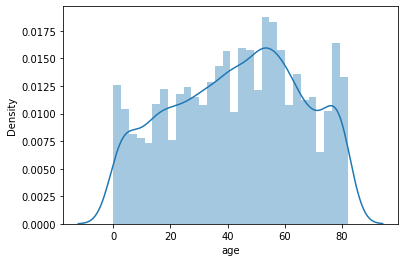

In [30]:
sns.distplot(df['age'], kde=True, bins=30)

C:\Users\swimt\.conda\envs\School\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

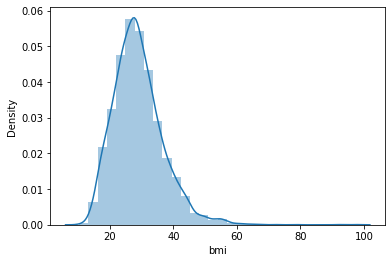

In [32]:
sns.distplot(df['bmi'], kde=True, bins=30)

C:\Users\swimt\.conda\envs\School\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

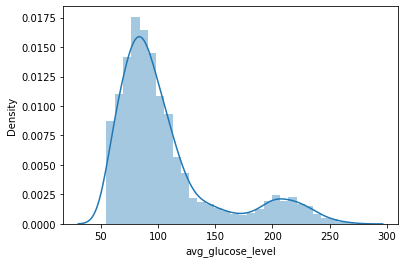

In [33]:
sns.distplot(df['avg_glucose_level'], kde=True, bins=30)

In [ ]:
#handling missing values & dropping id column
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.isnull().sum()